## Quest
A garden owner would like to examine the distinctiveness of different Iris flower classes (Iris Setosa, Iris Versicolour, and Iris Virginica) in his garden based on historical data measurements (sepal length, sepal width, petal length, petal width). With understanding of the differences, he’d also like to create a tool with help from a top data scientist to quickly retrieve records of the most similar Iris flowers in his garden for any input Iris flower.  
 
You, as a chosen data scientist, are required to develop a program using an open source programming language of your choice to perform the following:
- Reads in the data, accessed from: https://archive.ics.uci.edu/ml/datasets/Iris;
- Assesses the quality of the data;
- Takes as input arguments measured from a new Iris plant;
- Returns the ten most similar data points in the existing Iris data, to the inputted arguments of the program;
- Visualizes the result. 
- Make a few slides to illustrate the approach and findings.

### Step 1: Data Ingest

In [1]:
# read dataset
from urllib.request import urlretrieve
import pandas as pd
import numpy as np

iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urlretrieve(iris)

df = pd.read_csv(iris, sep=',', header = None, names=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Class'])

In [2]:
def get_info_dataframe(df):
    print(f"DATAFRAME GENERAL INFO - \n")
    print(df.info(),"\n")
    print(f"DATAFRAME MISSING INFO - \n")
    print(df.isnull().sum(),"\n")
    print(f"DATAFRAME SHAPE INFO - \n")
    print(df.shape)
    print(f"DATAFRAME STATISTICAL INFO - \n")
    print(df.describe())

get_info_dataframe(df)

DATAFRAME GENERAL INFO - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal Length  150 non-null    float64
 1   Sepal Width   150 non-null    float64
 2   Petal Length  150 non-null    float64
 3   Petal Width   150 non-null    float64
 4   Class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None 

DATAFRAME MISSING INFO - 

Sepal Length    0
Sepal Width     0
Petal Length    0
Petal Width     0
Class           0
dtype: int64 

DATAFRAME SHAPE INFO - 

(150, 5)
DATAFRAME STATISTICAL INFO - 

       Sepal Length  Sepal Width  Petal Length  Petal Width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5

### Step 2: Data Analysis

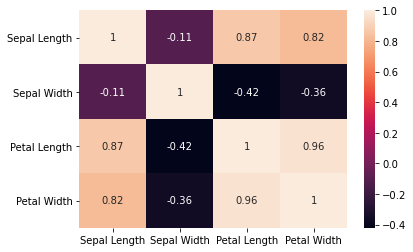

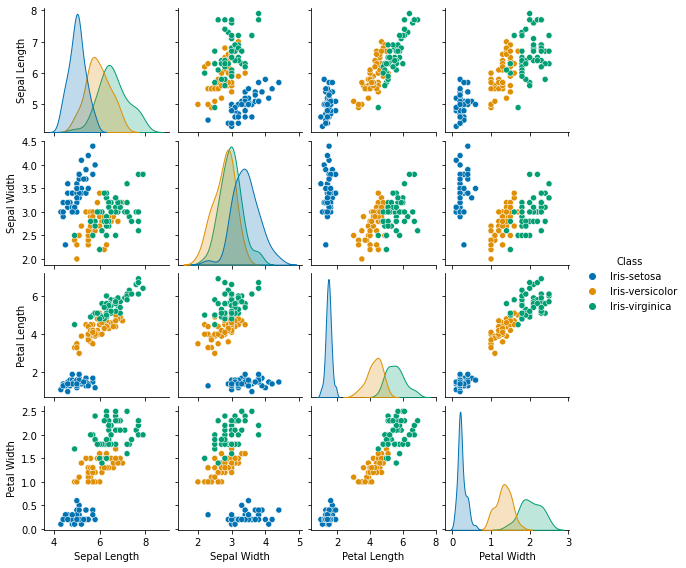

In [3]:
import seaborn as sns

# correlations
sns.heatmap(df.corr(), annot = True);

# pair plot to check relationship between features
sns.pairplot(df, hue="Class", height = 2, palette = 'colorblind');

### Step 3: Data Modelling

In [5]:
X = df.iloc[:,0:4]
y = df.iloc[:,4]

# split data into train/test (test size = 30%)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) 

print('{} sample training and {} samples test'.format(X_train.shape[0], X_test.shape[0]))

105 sample training and 45 samples test


In [6]:
#standardize the train/test values to a consistent scale
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [9]:
# model: kNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

model = KNeighborsClassifier(n_neighbors=10)

model.fit(X_train,y_train)
prediction=model.predict(X_test)

print('Accuracy:',"{:.3f}".format(metrics.accuracy_score(prediction,y_test)))

Accuracy: 0.978


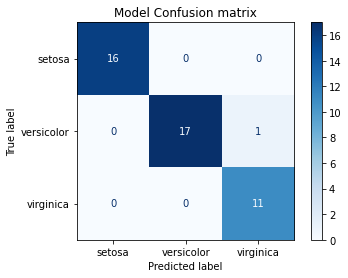

In [13]:
# confusion matrix
disp = metrics.plot_confusion_matrix(model, 
                                     X_test, 
                                     y_test,
                                     display_labels=['setosa', 'versicolor', 'virginica'],
                                     cmap=plt.cm.Blues,
                                     normalize=None)
disp.ax_.set_title('Model Confusion matrix');

### Step 4: Save Model

In [14]:
import pickle

filename = 'iris_classifier.sav'
pickle.dump(model, open(filename, 'wb'))

### Step 5: Forecast

In [15]:
# load the trained model
MODEL_PATH = 'iris_classifier.sav'

loaded_model = pickle.load(open(MODEL_PATH, 'rb'))

In [16]:
# prediction example
pred = loaded_model.predict([[-0.1,-0.56,0.71,1.51]])
print(pred)

['Iris-virginica']
